In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [9]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
city_url = url + weather_api_key

weather_data = requests.get(city_url).json()
pprint(weather_data)

{'city': {'coord': {'lat': 55.7522, 'lon': 37.6156},
          'country': 'RU',
          'id': 524901,
          'name': 'Moscow',
          'sunrise': 1587176176,
          'sunset': 1587228057,
          'timezone': 10800},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 79},
           'dt': 1587243600,
           'dt_txt': '2020-04-18 21:00:00',
           'main': {'feels_like': 268.14,
                    'grnd_level': 992,
                    'humidity': 84,
                    'pressure': 1008,
                    'sea_level': 1008,
                    'temp': 272.71,
                    'temp_kf': -1.73,
                    'temp_max': 274.44,
                    'temp_min': 272.71},
           'sys': {'pod': 'n'},
           'weather': [{'description': 'broken clouds',
                        'icon': '04n',
                        'id': 803,
                        'main': 'Clouds'}],
           'wind': {'deg': 261, 'speed': 3.15}},
          {'clouds': {'all': 78},
 

In [5]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
print (f'Beginning Data Retrieval')
print (f'-----------------------------')
for city in cities:
    response = requests.get (city_url + "&q=" + city + "&units=Imperial")
    weather_json = response.json()
    try:
        city_name.append (weather_json ['city']['name'])
        cloudiness.append (weather_json ['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f'Processing record {count} of Set 1 | {city}')
        
    except:
        print ('City not found. Skipping...')
        pass
print('end of stats loop')

Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | albany
Processing record 2 of Set 1 | viedma
Processing record 3 of Set 1 | westport
Processing record 4 of Set 1 | qaqortoq
Processing record 5 of Set 1 | tiznit
Processing record 6 of Set 1 | naze
Processing record 7 of Set 1 | georgetown
Processing record 8 of Set 1 | avarua
Processing record 9 of Set 1 | kununurra
Processing record 10 of Set 1 | ribeira grande
City not found. Skipping...
Processing record 11 of Set 1 | codrington
City not found. Skipping...
Processing record 12 of Set 1 | cape town
Processing record 13 of Set 1 | punta arenas
Processing record 14 of Set 1 | atuona
Processing record 15 of Set 1 | vaini
Processing record 16 of Set 1 | coquimbo
Processing record 17 of Set 1 | cap malheureux
City not found. Skipping...
Processing record 18 of Set 1 | luderitz
Processing record 19 of Set 1 | saint-francois
Processing record 20 of Set 1 | biak
Processing record 21 of Set 1 | lovozero
Pr

Processing record 186 of Set 1 | vikarabad
City not found. Skipping...
Processing record 187 of Set 1 | chuy
Processing record 188 of Set 1 | kirra
Processing record 189 of Set 1 | rorvik
Processing record 190 of Set 1 | sebeta
Processing record 191 of Set 1 | oranjestad
Processing record 192 of Set 1 | abeokuta
Processing record 193 of Set 1 | fortuna
Processing record 194 of Set 1 | touros
Processing record 195 of Set 1 | boddam
Processing record 196 of Set 1 | miri
Processing record 197 of Set 1 | husavik
Processing record 198 of Set 1 | fitchburg
Processing record 199 of Set 1 | janakkala
Processing record 200 of Set 1 | chimbote
Processing record 201 of Set 1 | bluff
Processing record 202 of Set 1 | neuquen
Processing record 203 of Set 1 | hermanus
City not found. Skipping...
Processing record 204 of Set 1 | linhares
Processing record 205 of Set 1 | mabaruma
Processing record 206 of Set 1 | mayfield
Processing record 207 of Set 1 | cordele
City not found. Skipping...
Processing re

Processing record 371 of Set 1 | bassano
Processing record 372 of Set 1 | taksimo
Processing record 373 of Set 1 | aripuana
Processing record 374 of Set 1 | general roca
Processing record 375 of Set 1 | tugulym
Processing record 376 of Set 1 | mantua
Processing record 377 of Set 1 | ndele
Processing record 378 of Set 1 | bireun
Processing record 379 of Set 1 | challapata
Processing record 380 of Set 1 | gizo
Processing record 381 of Set 1 | chisindia
Processing record 382 of Set 1 | brokopondo
Processing record 383 of Set 1 | teya
Processing record 384 of Set 1 | aguimes
Processing record 385 of Set 1 | san quintin
Processing record 386 of Set 1 | almazar
City not found. Skipping...
Processing record 387 of Set 1 | puerto quijarro
Processing record 388 of Set 1 | portland
Processing record 389 of Set 1 | erdenet
City not found. Skipping...
Processing record 390 of Set 1 | kaitong
Processing record 391 of Set 1 | tukrah
Processing record 392 of Set 1 | bereda
Processing record 393 of Se

Processing record 559 of Set 1 | vinh
Processing record 560 of Set 1 | praya
Processing record 561 of Set 1 | christchurch
Processing record 562 of Set 1 | bose
City not found. Skipping...
Processing record 563 of Set 1 | mapimi
Processing record 564 of Set 1 | slawno
Processing record 565 of Set 1 | troitsko-pechorsk
Processing record 566 of Set 1 | oranjemund
Processing record 567 of Set 1 | freetown
Processing record 568 of Set 1 | mayo
Processing record 569 of Set 1 | gigmoto
Processing record 570 of Set 1 | alice town
Processing record 571 of Set 1 | rodino
Processing record 572 of Set 1 | santa maria
Processing record 573 of Set 1 | mayor pablo lagerenza
Processing record 574 of Set 1 | yaval
Processing record 575 of Set 1 | anadyr
Processing record 576 of Set 1 | half moon bay
Processing record 577 of Set 1 | kirkuk
Processing record 578 of Set 1 | chartres
Processing record 579 of Set 1 | khalkhal
Processing record 580 of Set 1 | norman
City not found. Skipping...
Processing re

In [10]:
#Export the city data into a .csv.
#Display the DataFrame

weather_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": max_temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind_speed
})
weather_df.count()

City          586
Cloudiness    586
Country       586
Date          586
Humidity      586
Temp          586
Lat           586
Lng           586
Wind Speed    586
dtype: int64

In [11]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,Albany,93,US,1587243600,72,44.62,42.6001,-73.9662,6.87
1,Viedma,97,AR,1587243600,29,80.94,-40.8135,-62.9967,21.27
2,Westport,99,US,1587243600,78,45.46,41.1415,-73.3579,11.74
3,Qaqortoq,87,GL,1587243600,93,30.24,60.7167,-46.0333,5.61
4,Tiznit Province,82,MA,1587243600,64,58.08,29.5833,-9.5000,9.26


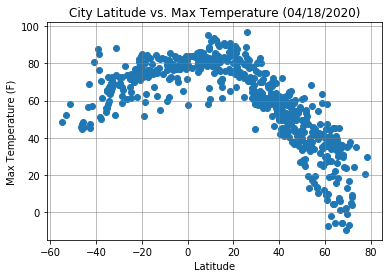

In [27]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.
lat = weather_df["Lat"]
temp = weather_df["Temp"]
plt.scatter(lat,temp)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (04/18/2020)')
plt.savefig('citylat_vs_maxtemp.png')
plt.show()

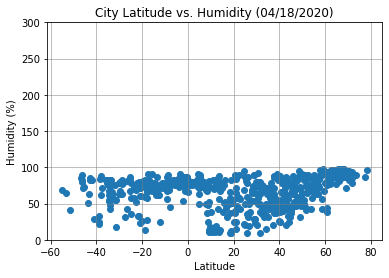

In [30]:
humidity = weather_df["Humidity"]
plt.scatter(lat,humidity)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.yticks(np.arange(0,350,50))
plt.title('City Latitude vs. Humidity (04/18/2020)')
plt.savefig('citylat_vs_humidity.png')
plt.show()

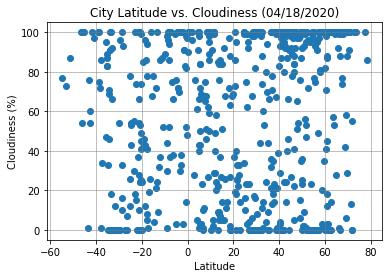

In [33]:
cloudiness = weather_df["Cloudiness"]
plt.scatter(lat,cloudiness)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (04/18/2020)')
plt.savefig('citylat_vs_cloudiness.png')
plt.show()

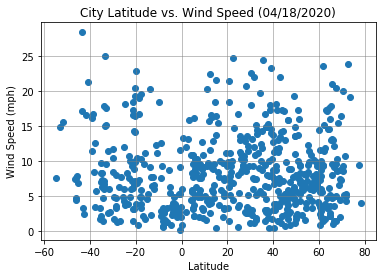

In [29]:
wind_speed = weather_df["Wind Speed"]
plt.scatter(lat,wind_speed)
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (04/18/2020)')
plt.savefig('citylat_vs_windspeed.png')
plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames
north_hemisphere_df = weather_df.loc[weather_df["Lat"] >= 0,:]
south_hemisphere_df = weather_df.loc[weather_df["Lat"] < 0,:]

south_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
1,Viedma,97,AR,1587243600,29,80.94,-40.8135,-62.9967,21.27
7,Avarua,54,CK,1587243600,73,80.56,-21.2078,-159.7750,17.25
8,Kununurra,68,AU,1587243600,68,79.68,-15.7667,128.7333,1.83
10,Codrington,72,AU,1587243600,84,50.97,-38.2667,141.9667,8.48
11,Cape Town,91,ZA,1587243600,48,68.04,-33.9258,18.4232,6.33


The r-squared is: 0.7671560677451603


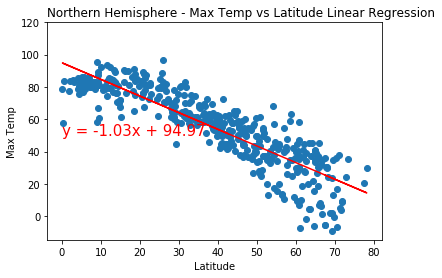

In [47]:
#reate a function to create Linear Regression plots
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.yticks(np.arange(0,130,20))
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.41567590189326553


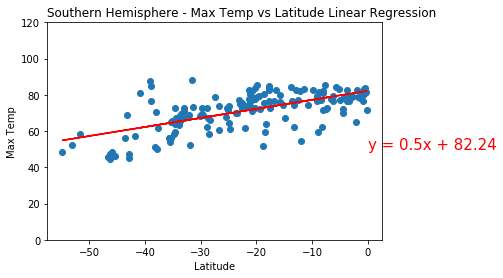

In [67]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.yticks(np.arange(0,130,20))
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.15601059420742752


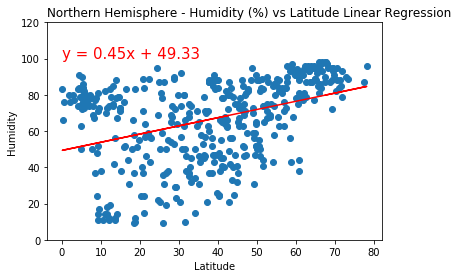

In [62]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.yticks(np.arange(0,130,20))
plt.title('Northern Hemisphere - Humidity (%) vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04888799216310776


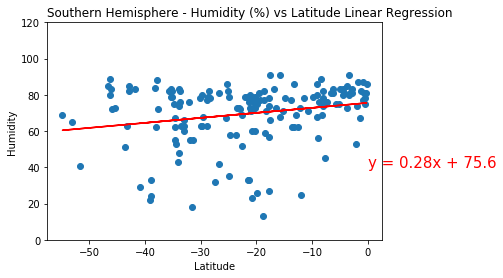

In [66]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.yticks(np.arange(0,130,20))
plt.title('Southern Hemisphere - Humidity (%) vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.028078566043394242


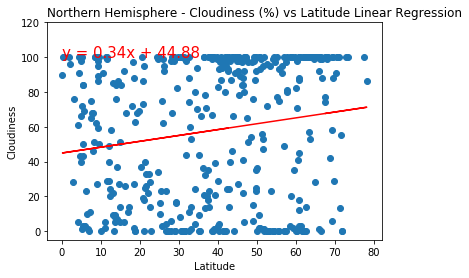

In [64]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.yticks(np.arange(0,130,20))
plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.002081922669448018


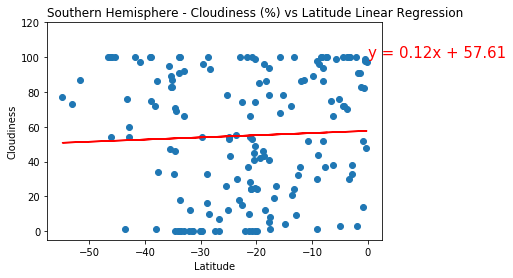

In [65]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.yticks(np.arange(0,130,20))
plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00011387217040206232


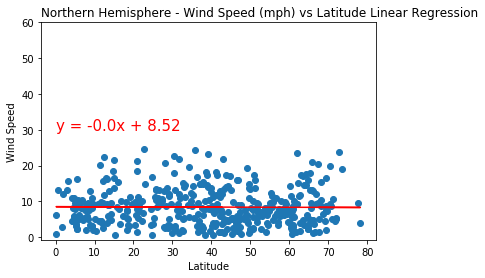

In [70]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_hemisphere_df['Lat']
y_values = north_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.yticks(np.arange(0,70,10))
plt.title('Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.09787964977987867


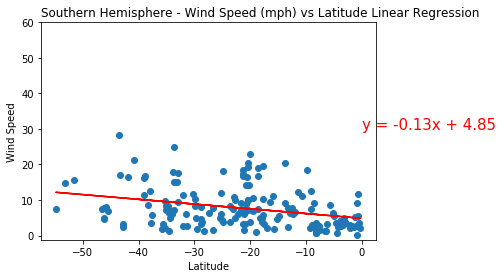

In [71]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_hemisphere_df['Lat']
y_values = south_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.yticks(np.arange(0,70,10))
plt.title('Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression', loc='left')
print(f"The r-squared is: {rvalue**2}")
plt.show()